### Automated Citation Tracker for Journal Publications

This notebook is designed to automate citation tracking for journal papers using DOI numbers.

**Purpose:**
The goal of this project is to collect citation metadata for academic papers and sort them by the latest published date. This will help researchers and academics track their paper citations efficiently.

**Features:**
- Fetch metadata for multiple DOIs
- Store the data in a clean and sorted format
- Export results to Excel for easy sharing
- Create a bar chart showing the most cited papers in descending order.

**Analyst:** Meena Maharjan

**Updated on:** Feb 22, 2025

##### IMPORT PACKAGES

In [41]:
import os
import pandas as pd
import requests #used to make HTTP requests (like fetching metadata from CrossRef).
from datetime import datetime # to handle dates and times
import textwrap #The textwrap module in Python is used to format text, like wrapping lines or adjusting the width of text blocks.

##### CHANGE THE WD TO THE FOLDER CONTAINING FILE

In [34]:
os.chdir(r"C:\Users\mmaha\citation-tracker\citation-tracker")

##### LABEL THE COLUMNS NEEDED

In [35]:
columns = [
    'Article Title',
    'Views',
    'Citations',
    'Mentions',
    'Last Updated'
]
# create an empty data frames with columns
df = pd.DataFrame (columns = columns)

#### PREPARE THE SCRIPT

In [36]:
def get_crossref_metadata(doi):
    url = f'https://api.crossref.org/works/{doi}'
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch metadata for DOI: {doi}")
        return None
    
    data = response.json()

    # Extract the article title
    article_title = data['message'].get('title', ['No Title Available'])[0]
    
    # Handle author data
    authors = []
    try:
        for author in data['message'].get('author', []):
            # Check if 'given' and 'family' are available
            given_name = author.get('given', '')
            family_name = author.get('family', '')
            if given_name and family_name:
                authors.append(f'{given_name} {family_name}')
            elif given_name:
                authors.append(given_name)
            elif family_name:
                authors.append(family_name)
            else:
                authors.append('Unknown Author')
    except KeyError:
        authors.append('Unknown Author')

    # Extract and format the publication date
    published_date_time = data['message'].get('created', {}).get('date-time', 'No Date Available')
    if published_date_time != 'No Date Available':
        published_date = datetime.fromisoformat(published_date_time).date()
    else:
        published_date = 'No Date Available'

    # Extract citation count (handle missing count)
    citation_count = data['message'].get('is-referenced-by-count', 'Not Available')

    # Construct the DOI link
    doi_link = f'https://doi.org/{doi}'

    return {
        'Authors': ', '.join(authors),
        'Title': article_title,
        'Published Date': published_date,
        'Citations': citation_count,
        'DOI link': doi_link
    }

##### LIST DOWN THE DOI OF THE PUBLICATIONS TO BE TRACKED

In [37]:
dois = ['10.3390/nu12061878', 
        '10.1136/bmjopen-2021-054839', 
        '10.1016/j.glt.2023.11.001', 
        '10.1177/1179173X231205377', 
        '10.3389/fpubh.2022.1012727', 
        '10.1377/hlthaff.26.6.w717',
        '10.14219/jada.archive.2008.0101',
        '10.1186/1477-7525-7-46',
        '10.1590/s0036-36342010000800017 ',
        '10.1136/tc.2009.035022',
        '10.1080/10810730.2011.601395',
        '10.1016/S0140-6736(11)61058-1',
        '10.1136/tc.2010.039321',
        '10.1136/tc.2010.041269',
        '10.1136/tobaccocontrol-2016-053564 ',
        '10.1016/j.aap.2016.01.005',
        '10.1007/s10552-012-9903-3',
        '10.1136/tobaccocontrol-2011-050171',
        '10.1136/tobaccocontrol-2012-050946',
        '10.1136/tobaccocontrol-2011-050282',
        '10.17061/phrp2531530',
        '10.1093/her/cyu044',
        '10.1093/her/cyv031',
        '10.1136/tobaccocontrol-2014-051682',
        '10.1186/s12889-015-2159-6',
        '10.1177/1179173X231205377',
        '10.1016/j.appet.2016.04.008',
        '10.1136/tobaccocontrol-2016-052968',
        '10.1111/1471-0528.14223',
        '10.1371/journal.pone.0151419',
        '10.4103/2224-3151.213791',
        '10.1016/S0140-6736(17)30819-X',
        '10.1136/tobaccocontrol-2016-053564',
        '10.21037/ACE.2019.07.03',
        '10.3390/nu12020569',
        '10.3390/nu12061878',
        '10.1371/journal.pone.0230050',
        '10.3390/nu12103124',
        '10.3390/nu12103124',
        '10.3389/frsc.2020.563350',
        '10.3390/nu12061878',
        '10.1016/j.appet.2022.106283',
        '10.1136/bmjgh-2021-007240',
        '10.3389/fpubh.2022.1012727',
        '10.1136/bmjopen-2021-056725',
        '10.1016/j.appet.2022.106283',
        '10.3390/nu14142866',
        '10.1016/j.appet.2022.106283',
        '10.3390/nu14142866',
        '10.1136/bmjopen-2021-054839',
        '10.3390/nu14153128',
        '10.9745/GHSP-D-21-00484',
        '10.9745/GHSP-D-21-00484',
        '10.1007/s40615-021-01167-5',
        '10.1371/journal.pone.0263324',
        '10.34172/ijhpm.2023.7685'
       ]

In [38]:
# Fetch metadata for each DOI
metadata_list = []
for doi in dois:
    metadata = get_crossref_metadata(doi)
    if metadata:
        metadata_list.append(metadata)

# Convert the list to a DataFrame for easy analysis and export to Excel
df = pd.DataFrame(metadata_list)

# Drop duplicate rows
df = df.drop_duplicates()

# Sort the DataFrame by the latest date first
df = df.sort_values(by='Published Date', ascending=False)

# Increase index by 1 before saving. It will start the count by 1.
df.index += 1

# Export to Excel with index starting at 1
#df.to_excel('../data/publications.xlsx', index=True)

##### OUTPUT

In [39]:
pd.set_option('display.max_colwidth', 100)  # Set maximum width of 10 characters

df

,Authors,Title,Published Date,Citations,DOI link
3,"Jiaruo Sun, Qingyu Li, Yuhang Zhang, Jiayin Zheng, Zi Xi, Xinyu Tan, Ashish Kumar Gupta, Nandita...",A mix-methods concept testing study of short videos for the national anti-cigarette gift giving ...,2023-11-28,0,https://doi.org/10.1016/j.glt.2023.11.001
4,"Nalin Singh Negi, Vineet Munish Gill, Meena Maharjan, Praveen Sinha, Pallavi Puri, Vaishakhi Mal...",An Observational Study of the Implementation of the Tobacco-Free Film and Television Policy in I...,2023-10-19,0,https://doi.org/10.1177/1179173X231205377
56,"Nandita Murukutla, Trish Cotter, Alexey Kotov",The Instrumental Role of Public and Stakeholder Engagement to the Success of Sugary Drinks Taxes...,2023-02-19,0,https://doi.org/10.34172/ijhpm.2023.7685
5,"Nandita Murukutla, Melina S. Magsumbol, Hana Raskin, Sharan Kuganesan, Silvia Dini, Carlos Marti...",A content analysis of e-cigarette marketing on social media: Findings from the Tobacco Enforceme...,2022-11-08,9,https://doi.org/10.3389/fpubh.2022.1012727
45,"Ashish K Gupta, Tom E Carroll, Yu Chen, Wenzhuo Liang, Laura K Cobb, Yichao Wang, Juan Zhang, Ye...",‘Love with Less Salt’: evaluation of a sodium reduction mass media campaign in China,2022-10-12,4,https://doi.org/10.1136/bmjopen-2021-056725
42,"Makoma Bopape, Jeroen De Man, Lindsey Smith Taillie, Shu Wen Ng, Nandita Murukutla, Rina Swart",Effect of different front-of-package food labels on identification of unhealthy products and int...,2022-08-24,3,https://doi.org/10.1016/j.appet.2022.106283
51,"S. K. Singh, Lindsey Smith Taillie, Ashish Gupta, Maxime Bercholz, Barry Popkin, Nandita Murukutla",Front-of-Package Labels on Unhealthy Packaged Foods in India: Evidence from a Randomized Field E...,2022-08-01,14,https://doi.org/10.3390/nu14153128
47,"Donnelle Christian, Meena Maharjan, Alexey Kotov, Trish Cotter, Sandra Mullin, Vonetta Nurse, Ba...",How the “Are We Drinking Ourselves Sick?” Communication Campaign Built Support for Policy Action...,2022-07-14,0,https://doi.org/10.3390/nu14142866
2,"Nandita Murukutla, Ashish K Gupta, Meena Maharjan, Cecilia Fabrizio, Emily W Myers, Andrew Johns...",Psychosocial determinants of adherence to public health and social measures (PHSMs) in 18 Africa...,2022-06-21,3,https://doi.org/10.1136/bmjopen-2021-054839
52,"Neena Prasad, Nguke Mwakatundu, Sunday Dominico, Prudence Masako, Wilfred Mongo, Yisambi Mwanshe...","Improving Maternal and Reproductive Health in Kigoma, Tanzania: A 13-Year Initiative",2022-04-29,3,https://doi.org/10.9745/GHSP-D-21-00484


#### HORIZONTAL BAR CHART SHOWING CITATIONS IN DESCENDING ORDER

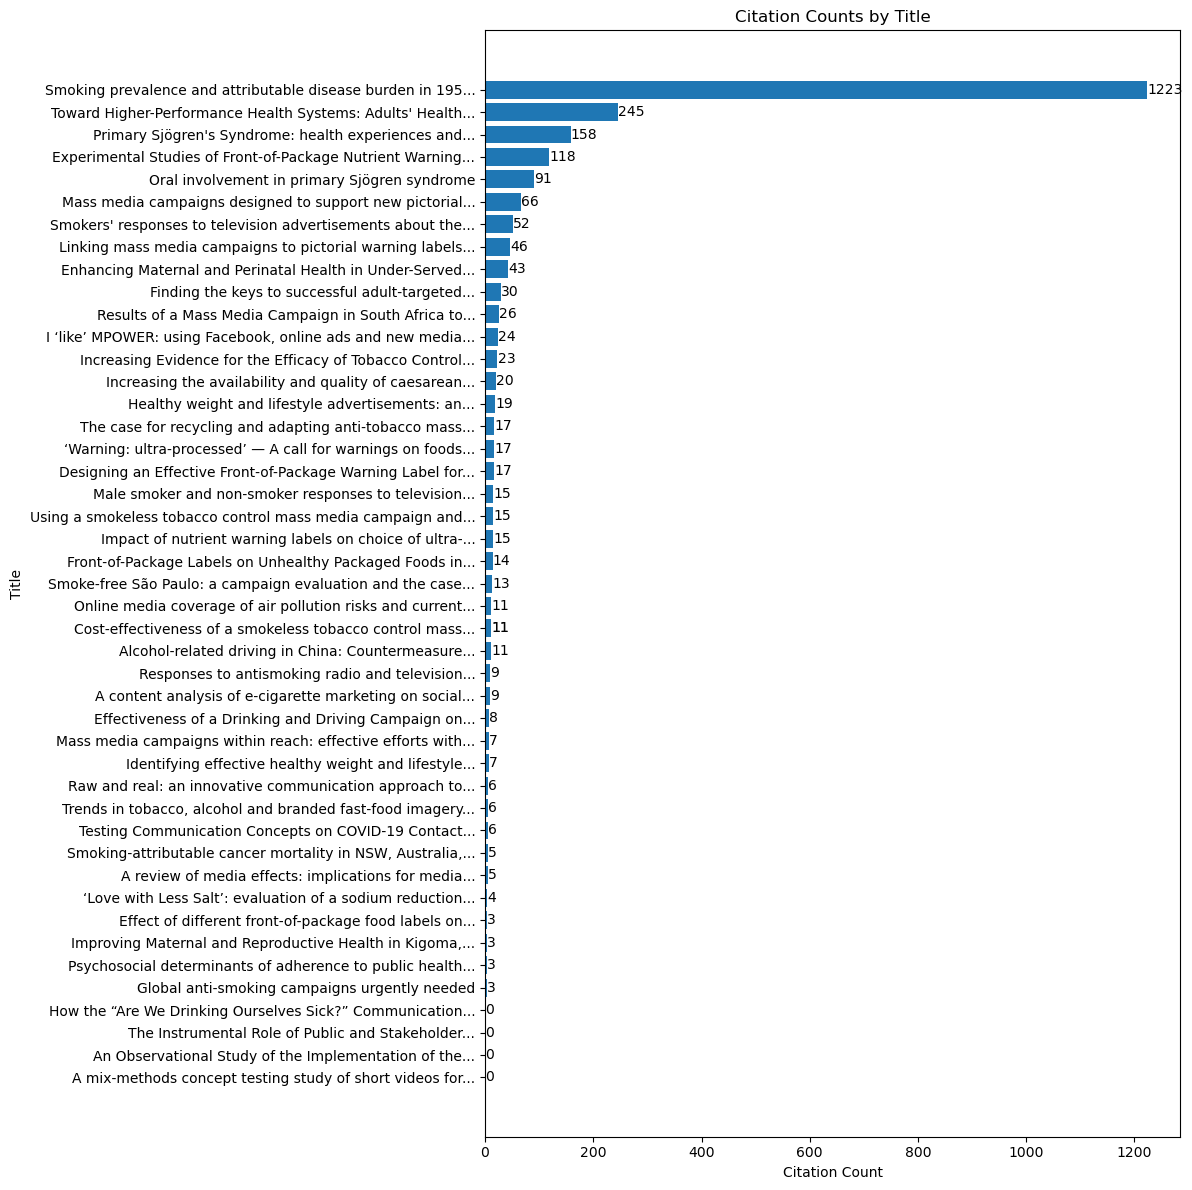

In [42]:
# Truncate the title text
df['Title'] = df['Title'].apply(lambda x: textwrap.shorten(x, width=60, placeholder='...'))

# Sort by citation count
df = df.sort_values(by='Citations', ascending=True)

plt.figure(figsize=(12, 12))
bars = plt.barh(df['Title'], df['Citations'])
plt.title('Citation Counts by Title')
plt.xlabel('Citation Count')
plt.ylabel('Title')

# Add counts next to the bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

plt.tight_layout()
plt.show()